# Exploratory Data Analysis and Machine Learning

This Jupyter Notebook contains Python code for performing exploratory data analysis (EDA) and building machine learning models. The code leverages libraries such as Pandas, NumPy, Matplotlib, Seaborn, and scikit-learn.


## Importing Libraries

We start by importing the necessary Python libraries for our analysis and visualization:
- Pandas (`pd`) for data manipulation.
- NumPy (`np`) for numerical operations.
- Matplotlib (`plt`) for basic plotting.
- Seaborn (`sns`) for advanced data visualization.
- Scikit-Learn for machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
sns.set(style="whitegrid")

## Configuration Settings

In [2]:
class Config:
    name_cvs_file = 'adult income1.csv'
    column_data_types = {
        'age': int,
        'fnlwgt': int,
        'education.num': int,
        'workclass': str,
        'education': str,
        'marital.status': str,
        'occupation': str,
        'relationship': str,
        'race': str,
        'sex': str,
        'native.country': str,
        'income': str
    }
    categorical_columns = [
        'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'
    ]

We define a Config class to store configuration parameters such as the name of the CSV file, column data types, and categorical columns.

## Data Loading and Preprocessing

We read a CSV file ('adult income1.csv') into a Pandas DataFrame (`df`) and perform the following data preprocessing steps:

- Replacing '?' values with `np.nan` to handle missing data.
- Converting columns to their specified data types defined in `Config`.

In [3]:
df = pd.read_csv(Config.name_cvs_file)
print(df.head(), end = '\n')
df.info()

   age workclass  fnlwgt education  education.num marital.status  occupation   
0   17   Private  148522      11th              7  Never-married  occupation  \
1   17   Private   93235      12th              8  Never-married  occupation   
2   17   Private  184924       9th              5  Never-married  occupation   
3   17   Private  116626      11th              7  Never-married  occupation   
4   17   Private  209949      11th              7  Never-married  occupation   

  relationship   race     sex native.country income  
0    Own-child  White    Male  United-States  <=50K  
1    Own-child  White  Female  United-States  <=50K  
2    Own-child  White    Male  United-States  <=50K  
3    Own-child  White    Male  United-States  <=50K  
4    Own-child  White  Female  United-States  <=50K  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  -----

In [4]:
df.replace('?', np.nan, inplace=True)
for column, dtype in Config.column_data_types.items():
    df[column] = df[column].astype(dtype)

In [5]:
summary_stats = df.describe()
print(summary_stats)

                age        fnlwgt  education.num
count  31947.000000  3.194700e+04   31947.000000
mean      38.570695  1.897319e+05      10.071149
std       13.646280  1.057567e+05       2.561430
min       17.000000  1.228500e+04       1.000000
25%       28.000000  1.176275e+05       9.000000
50%       37.000000  1.783120e+05      10.000000
75%       48.000000  2.374535e+05      12.000000
max       90.000000  1.484705e+06      16.000000


## Data Visualization


The `Vis_Data` function is defined to create informative data visualizations using Seaborn and Matplotlib. These visualizations include:

- A histogram of income distribution by gender.
- A count plot of workclass distribution.
- A histogram of age distribution with a kernel density estimate.
- A box plot showing the relationship between income and age.

In [6]:
def Vis_Data():
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 14))
    
    plot1 = sns.histplot(data=df, x='sex', hue='income', bins=30, palette='viridis', ax=axes[0,0])
    plot2 = sns.countplot(data=df, x='workclass', ax=axes[0,1])
    plot3 = sns.histplot(data=df, x='age', bins=30, kde=True, ax=axes[1,0])
    plot4 = sns.boxplot(data=df, x='income', y='age', notch=True,ax=axes[1,1])
    
    plot1.set_title('Income Distribution by Sex')
    plot2.set_title('Workclass Distribution')
    plot3.set_title('Age Distribution')
    plot4.set_title('Income vs. Age')
    
    plot1.set_xlabel('Sex')
    plot1.set_ylabel('Count')
    
    plot2.set_xlabel('Workclass')
    plot2.set_ylabel('Count')
    
    plot3.set_xlabel('Age')
    plot3.set_ylabel('Frequency')
    
    plot4.set_xlabel('Income')
    plot4.set_ylabel('Age')
    
    plot2.set_xticklabels(plot2.get_xticklabels(), rotation=35)
    
    plt.tight_layout()
    plt.show()

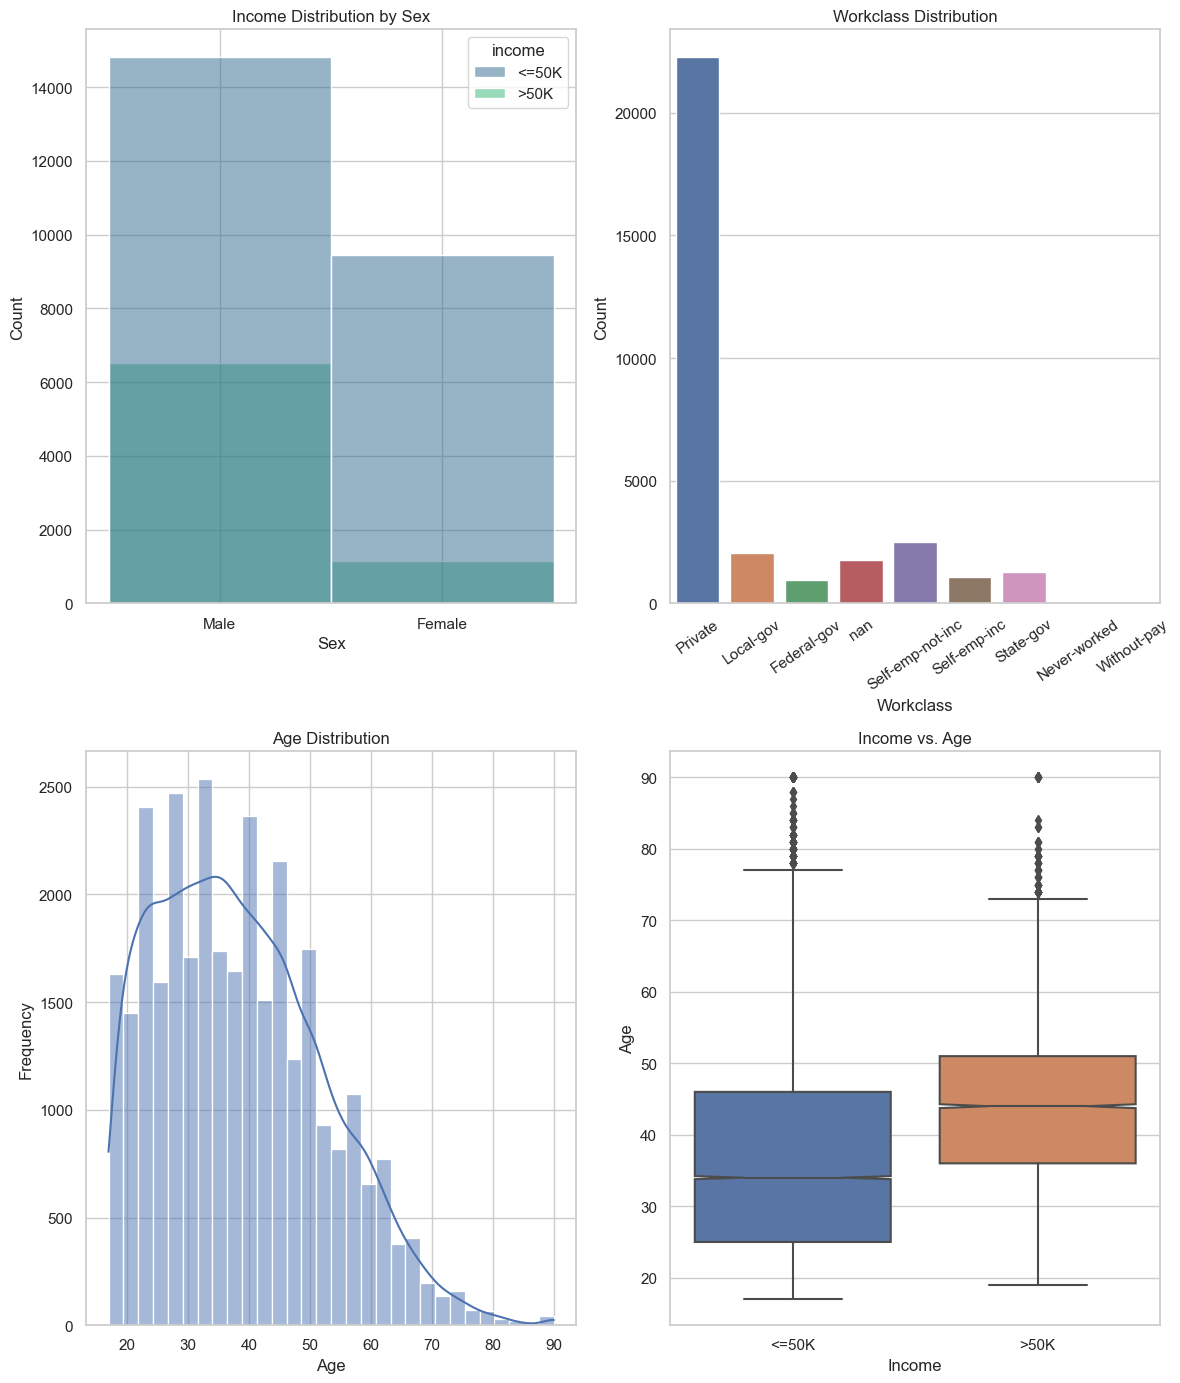

In [7]:
Vis_Data()

## Data Encoding

Before building machine learning models, we perform one-hot encoding on categorical columns and convert the 'income' column to binary values (0 for '<=50K' and 1 for '>50K').

In [8]:
data_encoded = pd.get_dummies(df, columns=Config.categorical_columns)
data_encoded['income'] = data_encoded['income'].replace({'<=50K': 0, '>50K': 1})
data_encoded.head(10)

,age,fnlwgt,education.num,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan
0,17,148522,7,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,17,93235,8,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,17,184924,5,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,17,116626,7,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,17,209949,7,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
5,17,225106,6,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
6,17,170916,6,0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,17,99893,7,0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8,17,218361,6,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9,17,132680,6,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


## Data Splitting

We split the data into training and testing sets using scikit-learn's `train_test_split` function.


In [9]:
X, y  = data_encoded.drop('income', axis=1) , data_encoded['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling and Evaluation

### For each model:

- Cross-validation is performed using k-fold cross-validation to assess model performance.
- Mean squared error (MSE) and R-squared (R2) scores are calculated and stored.
- Predictions are made on the test set (`y_pred_regline` and `y_pred_reg_forest`).

In [28]:
def cross_validate_and_evaluate(model, X, y, X_test, y_test):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = model.predict(X_test)
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    
    avg_mse = -mse_scores.mean()
    std_mse = mse_scores.std()
    avg_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()
    residuals = y_test - y_pred

    return avg_mse, std_mse, avg_r2, std_r2 , y_pred ,residuals

Two regression models are trained and evaluated:
- Linear Regression (`regr_line`).
- Random Forest Regression (`reg_forest`).

### 1. Linear Regression

We create a Linear Regression model, fit it to the data, and make predictions and calculate the metrics.

In [26]:
regr_line = LinearRegression()
regr_line.fit(X_train, y_train)

LinearRegression()

In [29]:
avg_mse_line, std_mse_line, avg_r2_line, std_r2_line, y_pred_regline, residuals_line = cross_validate_and_evaluate(regr_line, X, y, X_test, y_test)

### 2. Random Forest Regression

Similarly, we create a Random Forest Regression model, fit it to the data, and evaluate its performance using the same metrics and visualizations as with Linear Regression.

In [30]:
reg_forest = RandomForestRegressor()
reg_forest.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
avg_mse_forest, std_mse_forest, avg_r2_forest, std_r2_forest, y_pred_reg_forest, residuals_forest = cross_validate_and_evaluate(reg_forest, X, y, X_test, y_test)

## Visualization of Model Results

The `Vis_Model` function is defined to visualize model performance:
- Scatterplots show the relationship between actual and predicted values for both models.
- Histograms of residuals display the distribution of errors.
- Bar plots visualize the average MSE and R2 scores for model comparison.

In [36]:
def Vis_Model(y_test,y_pred,residuals, avg_mse_values, agv_r_squared, std_mse_values, std_r_squared):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 14))
    plot1 = sns.scatterplot(x=y_test, y=y_pred[0], color = 'blue', alpha=0.5,ax=axes[0,0])
    plot1.set_title("Actual vs. Predicted Values Line Regression")
    plot1.set_xlabel("Actual Values")
    plot1.set_ylabel("Predicted Values")
    
    plot2 = sns.scatterplot(x=y_test,color = 'red', y=y_pred[1], alpha=0.5,ax=axes[0,1])
    plot2.set_title("Actual vs. Predicted Values Forest Regression")
    plot2.set_xlabel("Actual Values")
    plot2.set_ylabel("Predicted Values")
    
    
    plot3 = sns.histplot(residuals[0], bins=30, kde=True, color='red',ax=axes[1,0])
    plot3.set_title("Histogram of Residuals Line Regression")
    plot3.set_xlabel("Residuals")
    plot3.set_ylabel("Frequency")
    
    
    plot4 = sns.histplot(residuals[1], bins=30, kde=True, color='blue',ax=axes[1,1])
    plot4.set_title("Histogram of Residuals Forest Regression")
    plot4.set_xlabel("Residuals")
    plot4.set_ylabel("Frequency")
    
    
    plot5 = sns.barplot(x=['Linear Regression', 'Random Forest'], y= avg_mse_values,  ax = axes[2,0], palette="Set1")
    plot5.set_title("AVG Distribution of Mean Squared Error (MSE)")
    plot5.set_xlabel("MSE Value")
    plot5.grid(axis='y', linestyle='--', alpha=0.7)
    
    plot6 = sns.barplot(x=['Linear Regression', 'Random Forest'], y= agv_r_squared, ax = axes[2,1], palette=['b', 'red'])
    plot6.set_title("AVG R2 score")
    plot6.set_ylabel("R2 score Value")
    plot6.grid(axis='y', linestyle='--', alpha=0.7)
    
    plot7 = sns.barplot(x=['Linear Regression', 'Random Forest'], y= std_mse_values, ax=axes[3,0],palette=['red', 'b'])
    plot7.set_title("STD Distribution of Mean Squared Error (MSE)")
    plot7.set_ylabel("MSE Value")
    plot7.grid(axis='y', linestyle='--', alpha=0.7)
    
    plot8 = sns.barplot(x=['Linear Regression', 'Random Forest'], y= std_r_squared, ax=axes[3,1], palette="Set1")
    plot8.set_title("STD R2 score")
    plot8.set_ylabel("R2 score Value")
    plot8.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

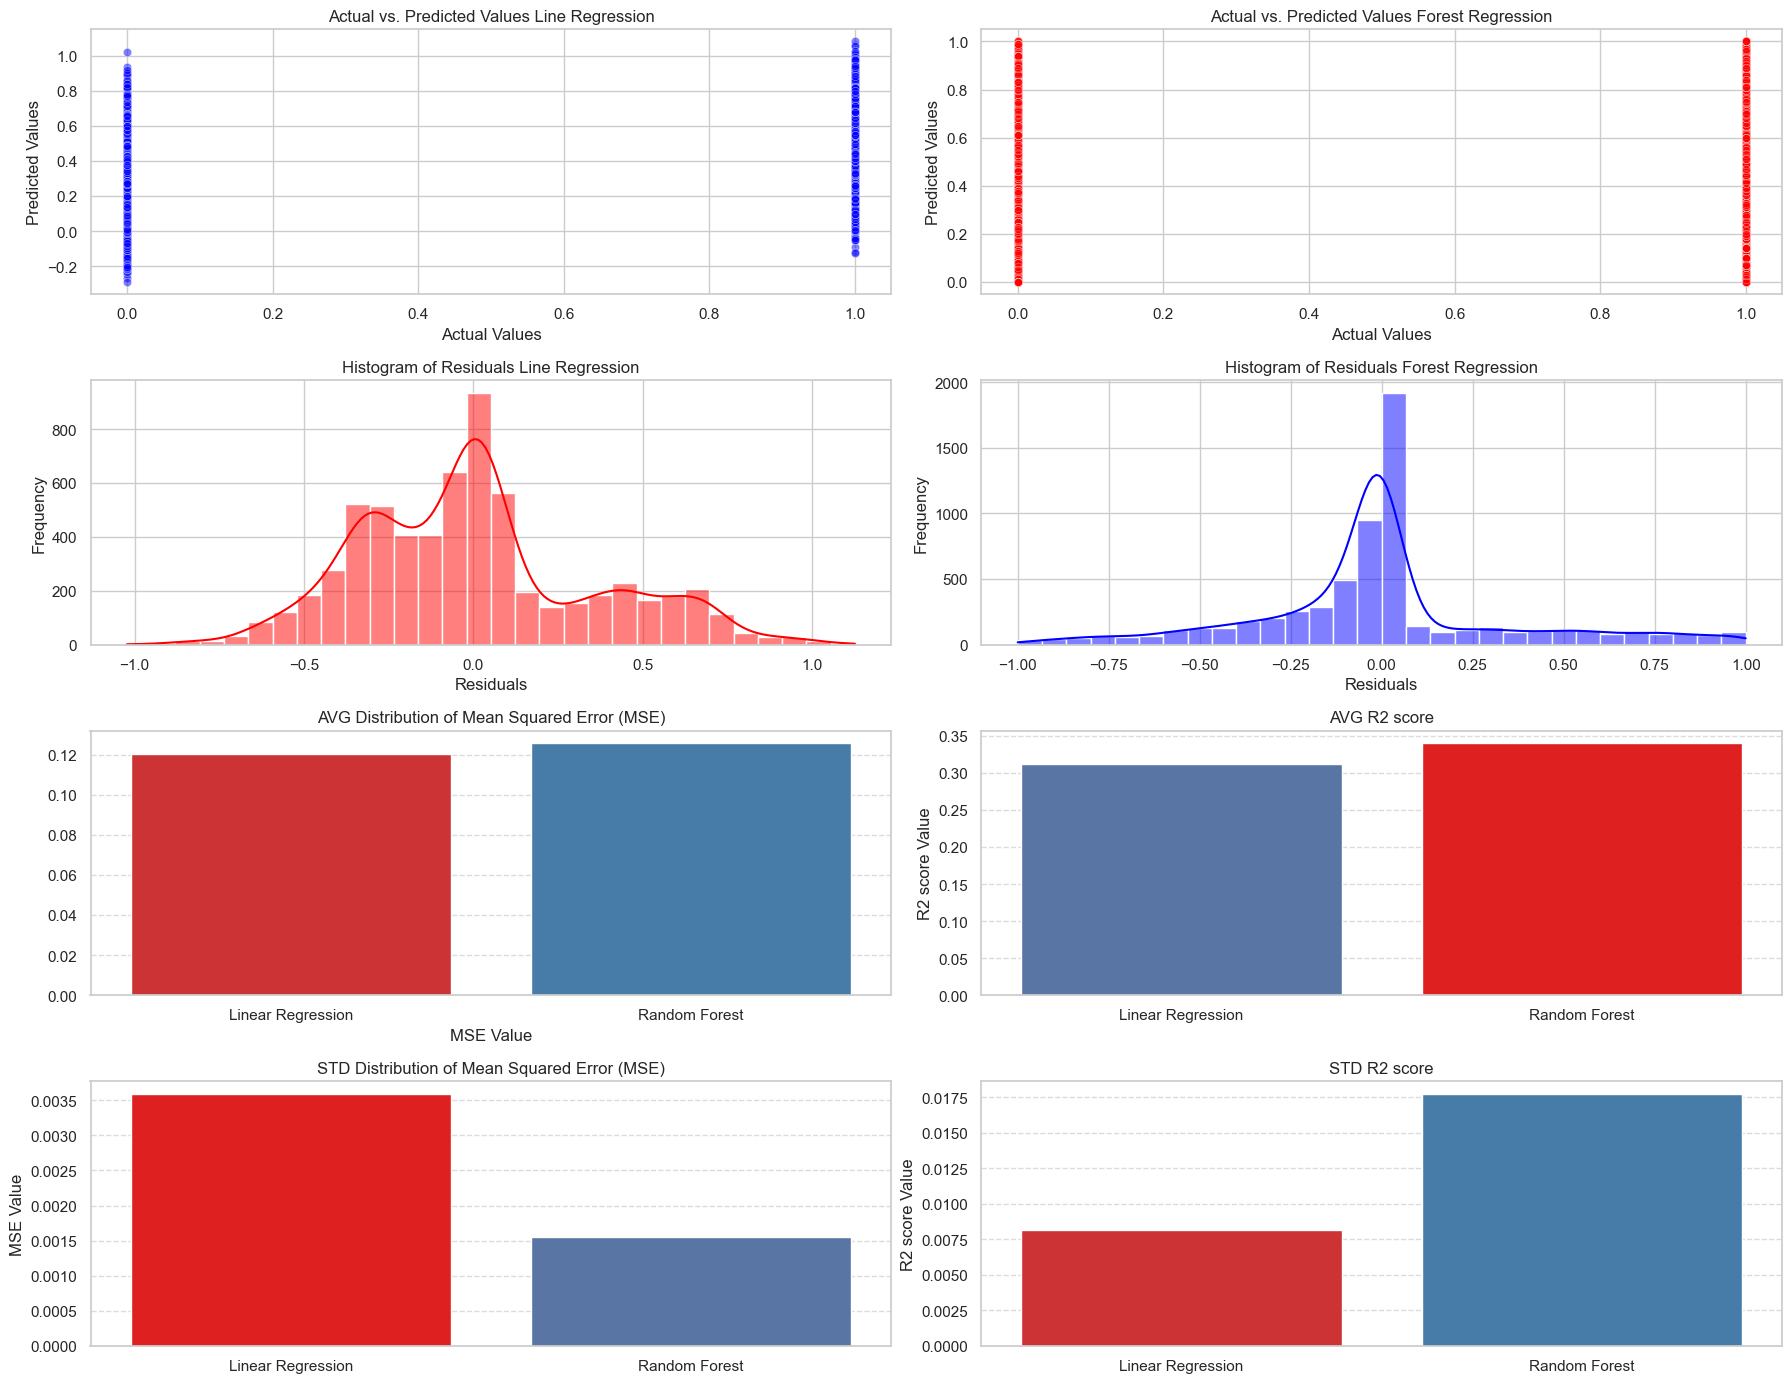

In [37]:
Vis_Model(
    y_test,
    [y_pred_regline,y_pred_reg_forest],
    [residuals_line,residuals_forest],
    [avg_mse_line, avg_mse_forest],
    [avg_r2_forest,avg_r2_line],
    [std_mse_forest,std_mse_line],
    [std_r2_line, std_r2_forest],
)

## Conclusion

This notebook provides a comprehensive overview of data analysis and regression modeling for the given dataset.

To execute this code successfully, ensure you have the required libraries installed and that the 'adult income1.csv' file is accessible in the specified path or update the file path accordingly.